In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_feather('optimised_nba.feather')
df.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10 00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10 00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10 00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10 00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10 00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [4]:
df.shape

(8314178, 16)

In [6]:
df.nunique()

gameId              122
playId             3762
nflId              1679
frameId             203
time             339484
jerseyNumber         99
team                 33
playDirection         2
x                 12069
y                  5741
s                  2734
a                  2209
dis                 667
o                 36001
dir               36001
event                27
dtype: int64

In [7]:
df.dtypes

gameId                    int64
playId                    int64
nflId                   float64
frameId                   int64
time             datetime64[ns]
jerseyNumber            float64
team                     object
playDirection          category
x                       float64
y                       float64
s                       float64
a                       float64
dis                     float64
o                       float64
dir                     float64
event                    object
dtype: object

In [8]:
df. isnull(). sum() * 100 / len(df)

gameId           0.000000
playId           0.000000
nflId            4.347826
frameId          0.000000
time             0.000000
jerseyNumber     4.347826
team             0.000000
playDirection    0.000000
x                0.000000
y                0.000000
s                0.000000
a                0.000000
dis              0.000000
o                4.347826
dir              4.347826
event            0.000000
dtype: float64

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
percent_missing

gameId           0.000000
playId           0.000000
nflId            4.347826
frameId          0.000000
time             0.000000
jerseyNumber     4.347826
team             0.000000
playDirection    0.000000
x                0.000000
y                0.000000
s                0.000000
a                0.000000
dis              0.000000
o                4.347826
dir              4.347826
event            0.000000
dtype: float64

In [10]:
missing_value_df

,column_name,percent_missing
gameId,gameId,0.000000
playId,playId,0.000000
nflId,nflId,4.347826
frameId,frameId,0.000000
time,time,0.000000
jerseyNumber,jerseyNumber,4.347826
team,team,0.000000
playDirection,playDirection,0.000000
x,x,0.000000
y,y,0.000000


In [11]:
df.loc[df['event'] == 'line_set']

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
1840,2021090900,187,35441.0,1,2021-09-10 00:29:15.000,93.0,TB,left,75.23,28.60,0.27,0.54,0.03,131.50,46.10,line_set
1871,2021090900,187,35454.0,1,2021-09-10 00:29:15.000,90.0,TB,left,76.12,21.19,0.31,0.56,0.04,54.33,15.07,line_set
1902,2021090900,187,37082.0,1,2021-09-10 00:29:15.000,77.0,DAL,left,78.14,23.29,0.06,0.05,0.02,278.01,130.65,line_set
1933,2021090900,187,38588.0,1,2021-09-10 00:29:15.000,54.0,TB,left,72.73,25.14,0.34,0.70,0.04,85.72,301.01,line_set
1964,2021090900,187,41915.0,1,2021-09-10 00:29:15.000,58.0,TB,left,75.15,31.82,0.86,0.70,0.09,132.04,63.76,line_set
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8234329,2021103112,4317,53504.0,46,2021-11-01 03:29:21.000,97.0,DAL,left,71.22,24.34,0.02,0.02,0.00,5.66,61.69,line_set
8234405,2021103112,4317,53586.0,25,2021-11-01 03:29:18.900,15.0,MIN,left,74.17,33.79,0.14,0.04,0.01,281.54,242.35,line_set
8234426,2021103112,4317,53586.0,46,2021-11-01 03:29:21.000,15.0,MIN,left,74.58,33.81,0.05,0.06,0.01,277.27,89.69,line_set
8234502,2021103112,4317,NaN,25,2021-11-01 03:29:18.900,NaN,football,left,71.99,29.89,0.00,0.00,0.00,NaN,NaN,line_set


In [12]:
dfslice = df.iloc[:,5:]
dfslice.head()

,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [13]:
dfslice.describe()

,jerseyNumber,x,y,s,a,dis,o,dir
count,7.952692e+06,8.314178e+06,8.314178e+06,8.314178e+06,8.314178e+06,8.314178e+06,7.952692e+06,7.952692e+06
mean,4.970117e+01,5.915866e+01,2.675380e+01,2.593350e+00,1.794459e+00,2.626317e-01,1.802045e+02,1.808868e+02
std,2.991778e+01,2.442278e+01,8.322079e+00,2.399735e+00,1.443276e+00,2.570499e-01,9.917450e+01,1.009824e+02
min,1.000000e+00,-3.550000e+00,-4.530000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.300000e+01,3.990000e+01,2.196000e+01,7.600000e-01,7.100000e-01,8.000000e-02,8.997000e+01,9.125000e+01
50%,5.200000e+01,5.885000e+01,2.676000e+01,2.140000e+00,1.540000e+00,2.200000e-01,1.793000e+02,1.805000e+02
75%,7.500000e+01,7.823000e+01,3.156000e+01,3.830000e+00,2.590000e+00,3.800000e-01,2.696300e+02,2.708400e+02
max,9.900000e+01,1.211500e+02,5.772000e+01,2.934000e+01,5.069000e+01,1.045000e+01,3.600000e+02,3.600000e+02


In [14]:
df['event'].nunique()

27

In [15]:
dfnew = dfslice.sample(frac=0.25)
dfnew.head()

,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
7256569,1.0,SF,left,22.76,23.27,3.10,0.13,0.31,66.50,291.15,None
2284710,4.0,WAS,right,30.12,23.87,0.24,2.45,0.01,188.65,123.25,None
3199082,85.0,SF,left,29.61,17.79,5.38,3.03,0.52,189.23,204.65,None
5307606,52.0,KC,right,32.83,26.07,2.34,0.54,0.24,118.14,249.92,None
512644,23.0,HOU,right,49.02,20.04,1.22,4.64,0.12,266.94,159.88,None


In [16]:
dfnew.describe()

,jerseyNumber,x,y,s,a,dis,o,dir
count,1.988270e+06,2.078544e+06,2.078544e+06,2.078544e+06,2.078544e+06,2.078544e+06,1.988270e+06,1.988270e+06
mean,4.971046e+01,5.915666e+01,2.676325e+01,2.593998e+00,1.794493e+00,2.626773e-01,1.802021e+02,1.807904e+02
std,2.991333e+01,2.443064e+01,8.317514e+00,2.400484e+00,1.443533e+00,2.567255e-01,9.915762e+01,1.009736e+02
min,1.000000e+00,-3.550000e+00,-4.530000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.300000e+01,3.990000e+01,2.197000e+01,7.600000e-01,7.100000e-01,8.000000e-02,9.000000e+01,9.118000e+01
50%,5.200000e+01,5.882000e+01,2.677000e+01,2.140000e+00,1.540000e+00,2.200000e-01,1.792000e+02,1.804000e+02
75%,7.600000e+01,7.824000e+01,3.156000e+01,3.830000e+00,2.590000e+00,3.800000e-01,2.696200e+02,2.708000e+02
max,9.900000e+01,1.211500e+02,5.632000e+01,2.838000e+01,3.257000e+01,8.530000e+00,3.600000e+02,3.600000e+02


In [17]:
dfnew['s'].value_counts()

0.00     130639
0.01      31949
0.02      18507
0.03      13793
0.04      11102
          ...  
18.56         1
17.64         1
27.48         1
14.97         1
10.40         1
Name: s, Length: 2379, dtype: int64

## Univariate Analysis

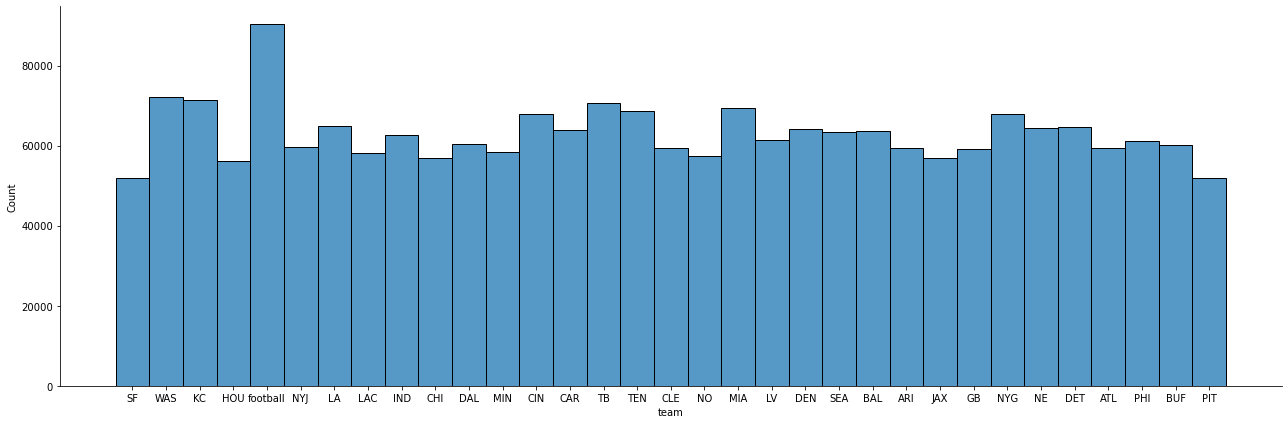

In [18]:
sns.displot(data=dfnew,x='team',height=6,aspect=3)
plt.show()

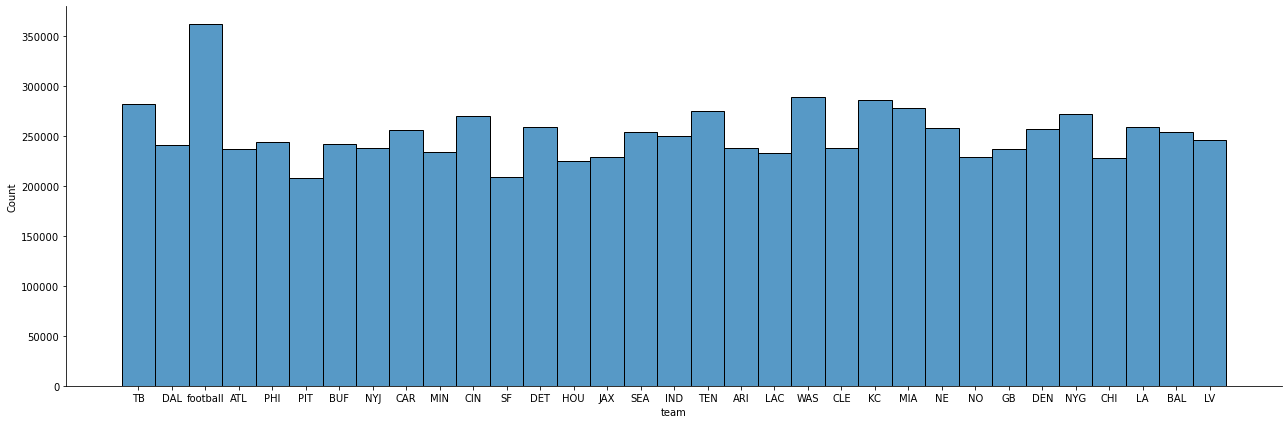

In [19]:
sns.displot(data=dfslice,x='team',height=6,aspect=3)
plt.show()

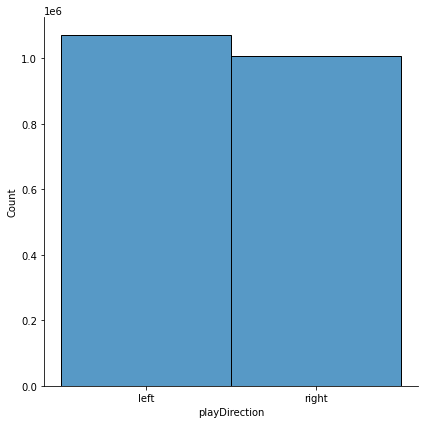

In [20]:
sns.displot(data=dfnew,x='playDirection',height=6,aspect=1)
plt.show()

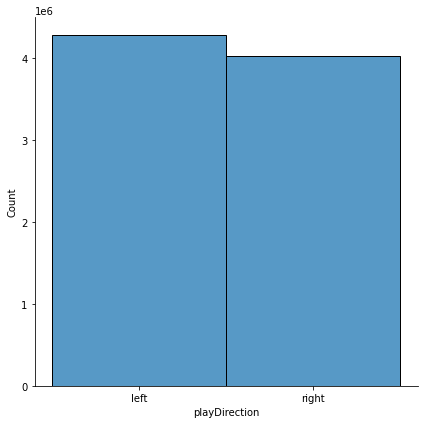

In [21]:
sns.displot(data=df,x='playDirection',height=6,aspect=1)
plt.show()

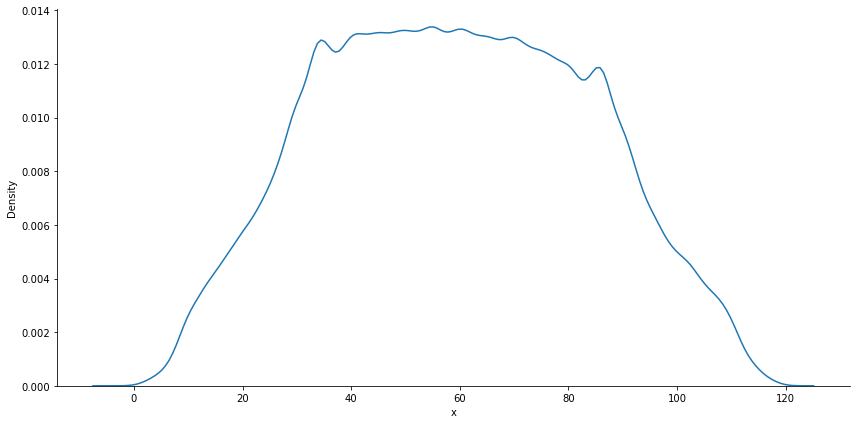

In [22]:
sns.displot(data=dfnew,x='x', kind='kde',height=6,aspect=2)
plt.show()

In [23]:
dfnew['s'].value_counts()

0.00     130639
0.01      31949
0.02      18507
0.03      13793
0.04      11102
          ...  
18.56         1
17.64         1
27.48         1
14.97         1
10.40         1
Name: s, Length: 2379, dtype: int64

In [24]:
dfspeed = dfnew.loc[dfnew['s']!=0.00]
dfspeed.head()

,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
7256569,1.0,SF,left,22.76,23.27,3.10,0.13,0.31,66.50,291.15,None
2284710,4.0,WAS,right,30.12,23.87,0.24,2.45,0.01,188.65,123.25,None
3199082,85.0,SF,left,29.61,17.79,5.38,3.03,0.52,189.23,204.65,None
5307606,52.0,KC,right,32.83,26.07,2.34,0.54,0.24,118.14,249.92,None
512644,23.0,HOU,right,49.02,20.04,1.22,4.64,0.12,266.94,159.88,None


In [25]:
dfspeed['s'].value_counts()

0.01     31949
0.02     18507
0.03     13793
0.04     11102
0.05      9817
         ...  
17.50        1
26.62        1
10.69        1
13.02        1
10.40        1
Name: s, Length: 2378, dtype: int64

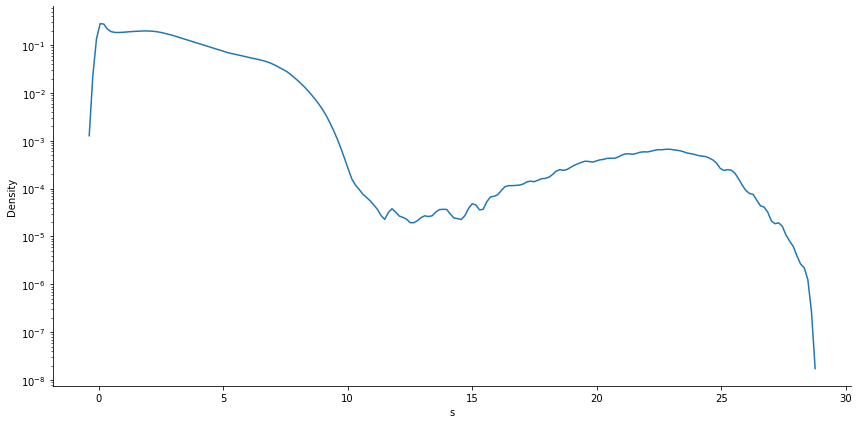

In [26]:
sns.displot(data=dfspeed,x='s',kind='kde',height=6,aspect=2)
plt.yscale('log')
plt.show()

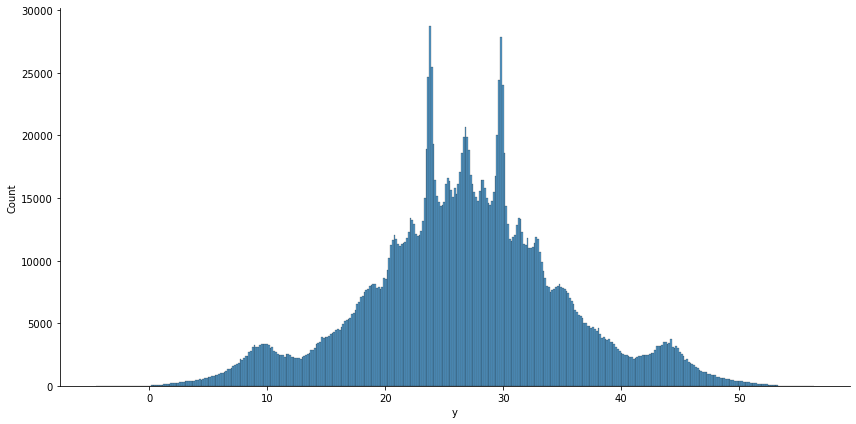

In [27]:
sns.displot(data=dfnew,x='y',height=6,aspect=2)
plt.show()

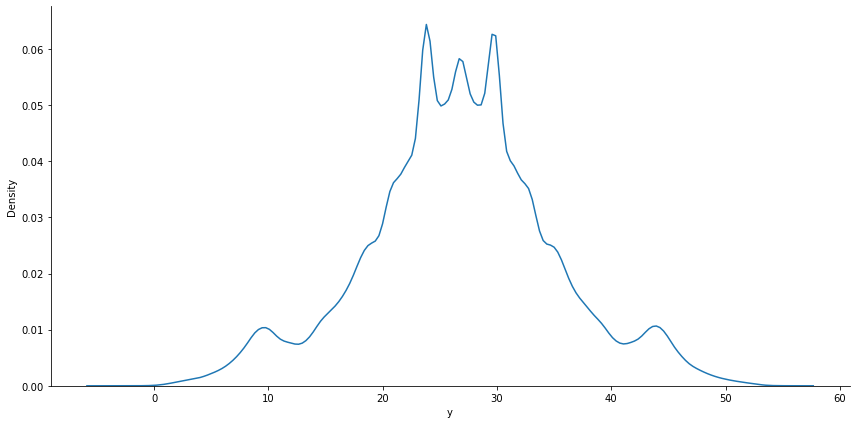

In [28]:
sns.displot(data=dfnew,x='y', kind='kde',height=6,aspect=2)
plt.show()

In [29]:
dfevent = dfnew.loc[df['event']!='None']

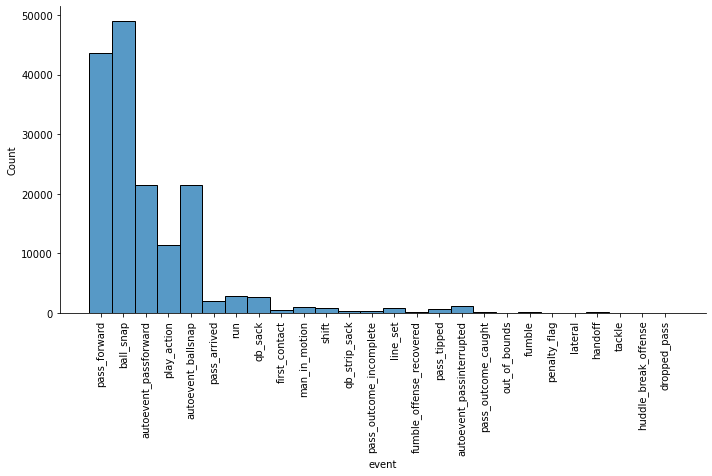

In [30]:
sns.displot(data=dfevent,x='event',height=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

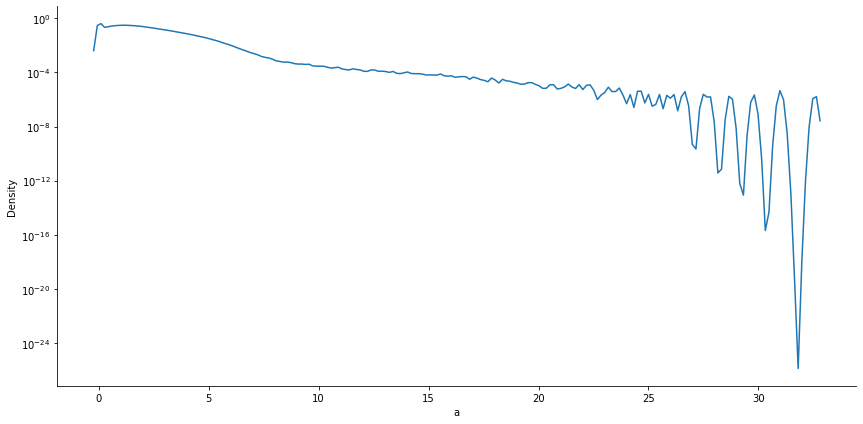

In [32]:
sns.displot(data=dfnew,x='a',kind='kde',height=6,aspect=2)
plt.yscale('log')
plt.show()

In [36]:
dfnew['a'].nlargest(5)

7355267    32.57
1480715    31.02
7458875    30.98
1665416    29.78
7355268    28.72
Name: a, dtype: float64

In [34]:
dfnew['a'].value_counts().nlargest(5)

0.00    121921
0.01     25061
0.02     14415
0.03     10977
0.04      8824
Name: a, dtype: int64

In [37]:
dfnew['a'].nsmallest(5)

2269281    0.0
7961024    0.0
6028936    0.0
6867857    0.0
7316570    0.0
Name: a, dtype: float64

In [35]:
dfnew['a'].value_counts().nsmallest(5)

15.31    1
14.87    1
15.96    1
18.97    1
15.53    1
Name: a, dtype: int64

In [38]:
dfacceleration = dfnew.loc[dfnew['a']!=0.00]
dfacceleration.head()

,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
7256569,1.0,SF,left,22.76,23.27,3.10,0.13,0.31,66.50,291.15,None
2284710,4.0,WAS,right,30.12,23.87,0.24,2.45,0.01,188.65,123.25,None
3199082,85.0,SF,left,29.61,17.79,5.38,3.03,0.52,189.23,204.65,None
5307606,52.0,KC,right,32.83,26.07,2.34,0.54,0.24,118.14,249.92,None
512644,23.0,HOU,right,49.02,20.04,1.22,4.64,0.12,266.94,159.88,None


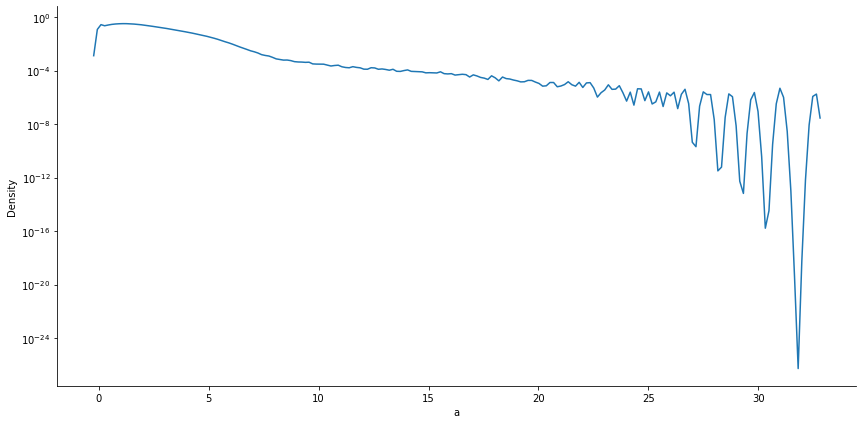

In [41]:
sns.displot(data=dfacceleration,x='a', kind = 'kde',height=6,aspect=2)
plt.yscale('log')
plt.show()

In [43]:
df['dis'].nsmallest(5)

86     0.0
88     0.0
89     0.0
215    0.0
216    0.0
Name: dis, dtype: float64

In [44]:
dfdis = dfnew.loc[dfnew['dis']!=0.00]
dfdis.head()

,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
7256569,1.0,SF,left,22.76,23.27,3.10,0.13,0.31,66.50,291.15,None
2284710,4.0,WAS,right,30.12,23.87,0.24,2.45,0.01,188.65,123.25,None
3199082,85.0,SF,left,29.61,17.79,5.38,3.03,0.52,189.23,204.65,None
5307606,52.0,KC,right,32.83,26.07,2.34,0.54,0.24,118.14,249.92,None
512644,23.0,HOU,right,49.02,20.04,1.22,4.64,0.12,266.94,159.88,None


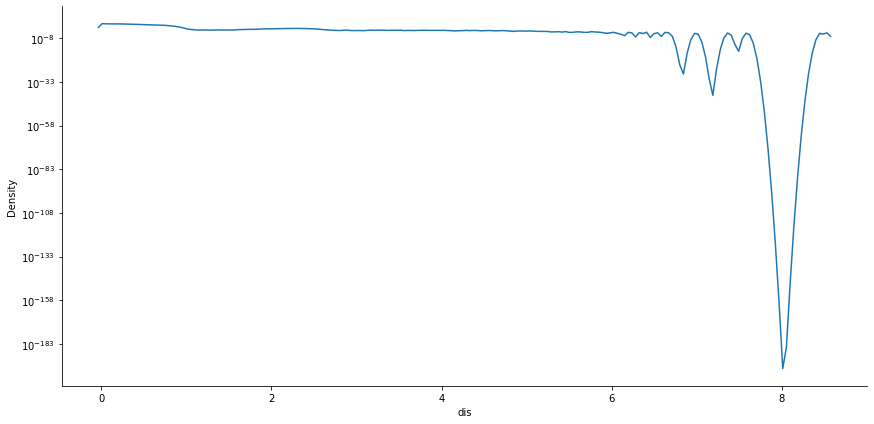

In [46]:
sns.displot(data=dfdis,x='dis',kind = 'kde',height=6,aspect=2)
plt.yscale('log')
plt.show()

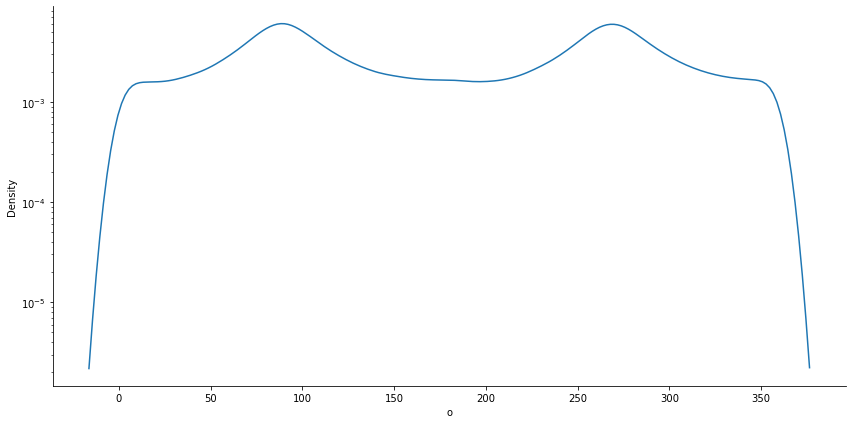

In [47]:
sns.displot(data=dfnew,x='o',kind = 'kde',height=6,aspect=2)
plt.yscale('log')
plt.show()

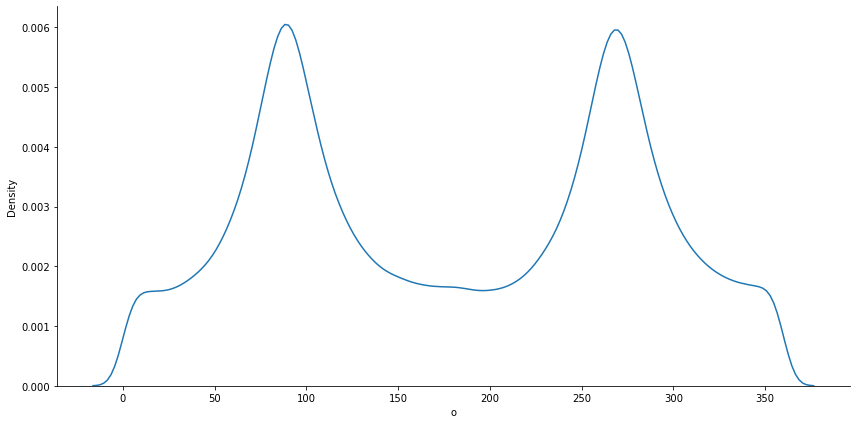

In [49]:
sns.displot(data=dfnew,x='o',kind = 'kde',height=6,aspect=2)
plt.show()

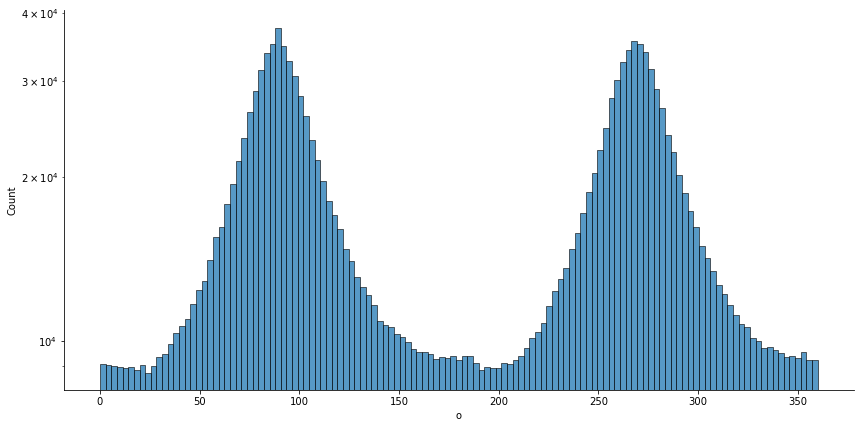

In [48]:
sns.displot(data=dfnew,x='o',height=6,aspect=2)
plt.yscale('log')
plt.show()

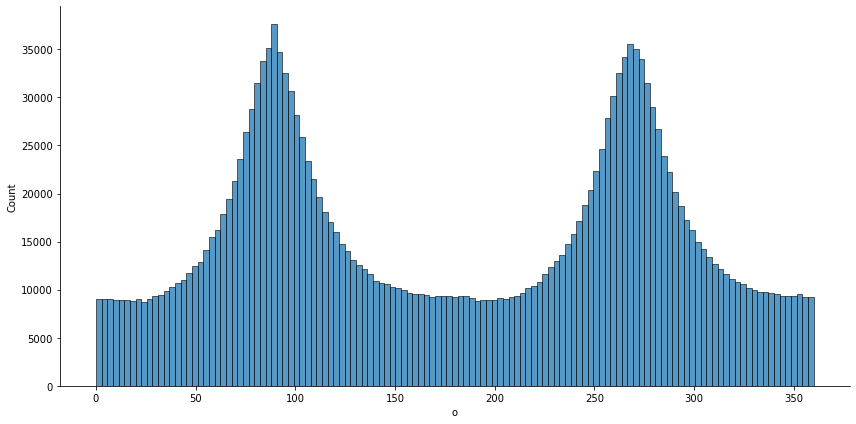

In [50]:
sns.displot(data=dfnew,x='o',height=6,aspect=2)
plt.show()

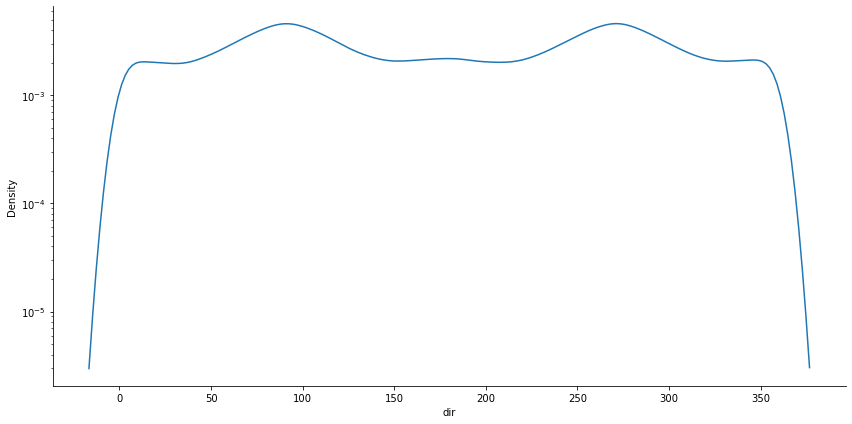

In [51]:
sns.displot(data=dfnew,x='dir',kind = 'kde',height=6,aspect=2)
plt.yscale('log')
plt.show()

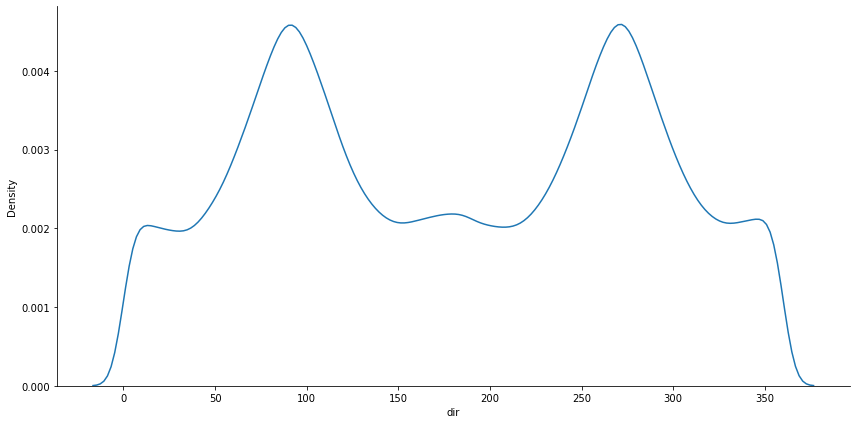

In [52]:
sns.displot(data=dfnew,x='dir',kind = 'kde',height=6,aspect=2)
plt.show()

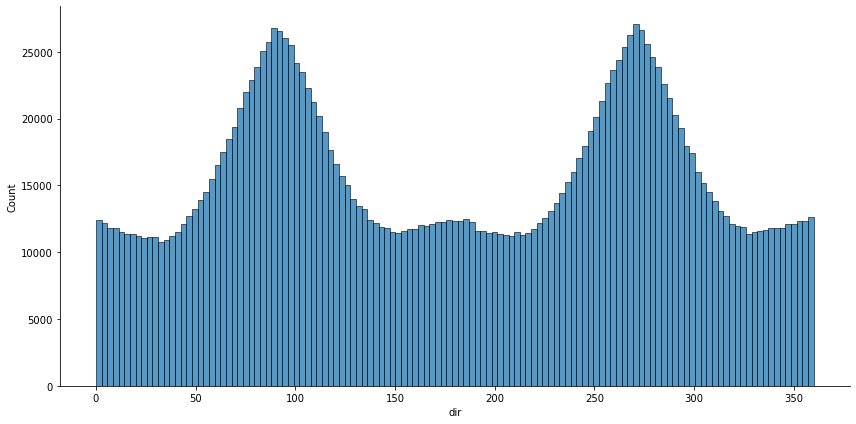

In [53]:
sns.displot(data=dfnew,x='dir',height=6,aspect=2)
plt.show()

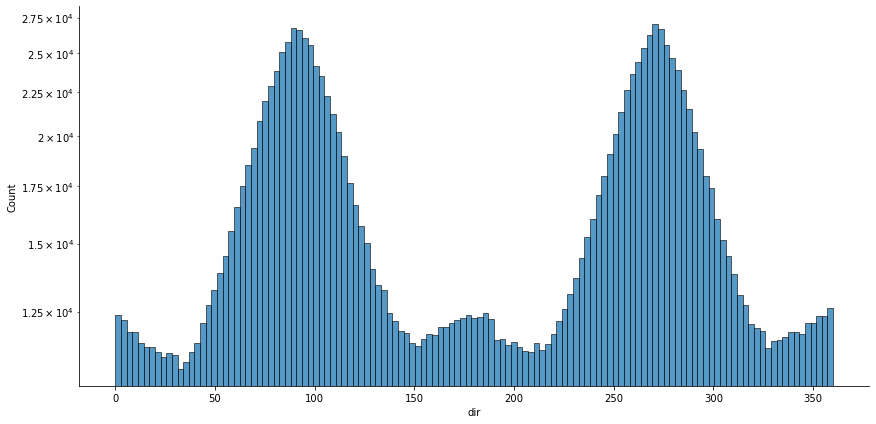

In [54]:
sns.displot(data=dfnew,x='dir',height=6,aspect=2)
plt.yscale('log')
plt.show()

In [ ]:
for col in dfnew.columns:
    if col in numeric_feature:
        try:
            fig = plt.figure()
            ax = fig.add_subplot()
            ax.hist(dfnew[col])
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.set_title('Distribution of values')
            plt.savefig(f'hist_{col}.png')
        except:
            print(f'Error: hist_{col}.png' )
        

In [ ]:
for col in dfnew.columns:
    if col in numeric_feature:
        try:
            fig = plt.figure()
            ax = fig.add_subplot()
            ax.boxplot(dfnew[col])
            ax.set_xlabel(col)
            ax.set_ylabel('values')
            ax.set_title('Outlier analysis')
            plt.savefig(f'box_{col}.png')
        except:
            print(f'Error: box_{col}.png' )